<a href="https://colab.research.google.com/github/gerardbullock/gerardbullock.github.io/blob/main/Sample_SuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [2]:
df=pd.read_excel('/content/Sample - Superstore.xls')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
df=df[['Ship Mode', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit']]

In [5]:
df['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [6]:
df['Sub-Category'].unique()

array(['Paper', 'Binders', 'Labels', 'Storage', 'Art', 'Chairs',
       'Fasteners', 'Phones', 'Furnishings', 'Accessories', 'Bookcases',
       'Envelopes', 'Appliances', 'Tables', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [7]:
df['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [9]:
df.head(1)

,Ship Mode,Segment,Country/Region,City,State/Province,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,United States,Houston,Texas,Central,Office Supplies,Paper,16.448,2,0.2,5.5512


In [10]:
df['Category'].value_counts()

Office Supplies    6128
Furniture          2201
Technology         1865
Name: Category, dtype: int64

In [11]:
#total number of products in all categories
df['Category'].value_counts().sum()

10194

In [12]:
#number of products in all categories
df['Sub-Category'].nunique()

17

In [13]:
#number of products in each sub-category
df['Sub-Category'].value_counts()

Binders        1548
Paper          1384
Furnishings    1009
Phones          903
Storage         856
Art             821
Accessories     775
Chairs          634
Appliances      474
Labels          368
Tables          326
Envelopes       256
Bookcases       232
Fasteners       229
Supplies        192
Machines        117
Copiers          70
Name: Sub-Category, dtype: int64

In [14]:
#types of regions
df['Region'].unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [15]:
#types of shipmodes
df['Ship Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [16]:
#unique states
df['State/Province'].unique()

array(['Texas', 'Illinois', 'Pennsylvania', 'Kentucky', 'Georgia',
       'California', 'Virginia', 'Delaware', 'South Carolina', 'Ohio',
       'Louisiana', 'Oregon', 'Arizona', 'Arkansas', 'Michigan',
       'Tennessee', 'Florida', 'Ontario', 'Indiana', 'Nevada',
       'South Dakota', 'New York', 'Wisconsin', 'Washington',
       'New Jersey', 'Missouri', 'North Carolina', 'Colorado', 'Alberta',
       'Utah', 'Minnesota', 'Mississippi', 'Iowa', 'New Mexico',
       'Massachusetts', 'Alabama', 'Idaho', 'Montana', 'Maryland',
       'Connecticut', 'New Hampshire', 'British Columbia', 'Quebec',
       'Nova Scotia', 'Oklahoma', 'Nebraska', 'Maine', 'Kansas',
       'Rhode Island', 'Newfoundland and Labrador', 'New Brunswick',
       'Prince Edward Island', 'District of Columbia', 'Vermont',
       'Manitoba', 'Saskatchewan', 'Wyoming', 'North Dakota',
       'West Virginia'], dtype=object)

In [17]:
#unique citys
df['City'].unique()

array(['Houston', 'Naperville', 'Philadelphia', 'Henderson', 'Athens',
       'Los Angeles', 'Huntsville', 'Laredo', 'Springfield', 'Dover',
       'San Francisco', 'Mount Pleasant', 'Newark', 'Bossier City',
       'Roswell', 'Scottsdale', 'Jonesboro', 'Westland', 'Smyrna',
       'Miami', 'Toronto', 'Lafayette', 'Las Vegas', 'Rapid City',
       'Alexandria', 'San Diego', 'New York City', 'Detroit',
       'Mission Viejo', 'Green Bay', 'Saint Petersburg', 'Seattle',
       'Escondido', 'Romeoville', 'Chesapeake', 'Linden',
       'North Las Vegas', 'Columbia', 'Concord', 'Dallas', 'Chicago',
       'Lubbock', 'Arlington', 'Richmond', 'Woodstock', 'Moreno Valley',
       'El Paso', 'Medford', 'Columbus', 'Elmhurst', 'Wilmington',
       'Margate', 'Yonkers', 'Des Moines', 'Denver', 'Royal Oak',
       'Roseville', 'Calgary', 'Huntington Beach', 'Logan',
       'Jacksonville', 'Tampa', 'Raleigh', 'Lakeville', 'Jackson',
       'Burbank', 'Lakeland', 'Knoxville', 'Hamilton', 'Asheville'

In [18]:
#number of unique values in each column
df.nunique()

Ship Mode            4
Segment              3
Country/Region       2
City               542
State/Province      59
Region               4
Category             3
Sub-Category        17
Sales             6161
Quantity            14
Discount            12
Profit            7597
dtype: int64

In [19]:
#full summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       10194 non-null  object 
 1   Segment         10194 non-null  object 
 2   Country/Region  10194 non-null  object 
 3   City            10194 non-null  object 
 4   State/Province  10194 non-null  object 
 5   Region          10194 non-null  object 
 6   Category        10194 non-null  object 
 7   Sub-Category    10194 non-null  object 
 8   Sales           10194 non-null  float64
 9   Quantity        10194 non-null  int64  
 10  Discount        10194 non-null  float64
 11  Profit          10194 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 955.8+ KB


In [20]:
#statistical summary of data
df.describe()

,Sales,Quantity,Discount,Profit
count,10194.000000,10194.000000,10194.000000,10194.000000
mean,228.225854,3.791838,0.155385,28.673417
std,619.906839,2.228317,0.206249,232.465115
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.220000,2.000000,0.000000,1.760800
50%,53.910000,3.000000,0.200000,8.690000
75%,209.500000,5.000000,0.200000,29.297925
max,22638.480000,14.000000,0.800000,8399.976000


In [21]:
#total number of null values is data
df.isnull().sum()

Ship Mode         0
Segment           0
Country/Region    0
City              0
State/Province    0
Region            0
Category          0
Sub-Category      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [22]:
print('total number of null values =',df.isnull().sum().sum())

total number of null values = 0


In [23]:
#data types
df.dtypes

Ship Mode          object
Segment            object
Country/Region     object
City               object
State/Province     object
Region             object
Category           object
Sub-Category       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object

In [24]:
#unique data in each column
for col in df:
  print(df[col].unique())

['Standard Class' 'First Class' 'Second Class' 'Same Day']
['Consumer' 'Home Office' 'Corporate']
['United States' 'Canada']
['Houston' 'Naperville' 'Philadelphia' 'Henderson' 'Athens' 'Los Angeles'
 'Huntsville' 'Laredo' 'Springfield' 'Dover' 'San Francisco'
 'Mount Pleasant' 'Newark' 'Bossier City' 'Roswell' 'Scottsdale'
 'Jonesboro' 'Westland' 'Smyrna' 'Miami' 'Toronto' 'Lafayette' 'Las Vegas'
 'Rapid City' 'Alexandria' 'San Diego' 'New York City' 'Detroit'
 'Mission Viejo' 'Green Bay' 'Saint Petersburg' 'Seattle' 'Escondido'
 'Romeoville' 'Chesapeake' 'Linden' 'North Las Vegas' 'Columbia' 'Concord'
 'Dallas' 'Chicago' 'Lubbock' 'Arlington' 'Richmond' 'Woodstock'
 'Moreno Valley' 'El Paso' 'Medford' 'Columbus' 'Elmhurst' 'Wilmington'
 'Margate' 'Yonkers' 'Des Moines' 'Denver' 'Royal Oak' 'Roseville'
 'Calgary' 'Huntington Beach' 'Logan' 'Jacksonville' 'Tampa' 'Raleigh'
 'Lakeville' 'Jackson' 'Burbank' 'Lakeland' 'Knoxville' 'Hamilton'
 'Asheville' 'Tucson' 'Portage' 'Greensboro' 'De

In [25]:
#number od duplicate values in data
df.duplicated().sum()

112

<AxesSubplot:>

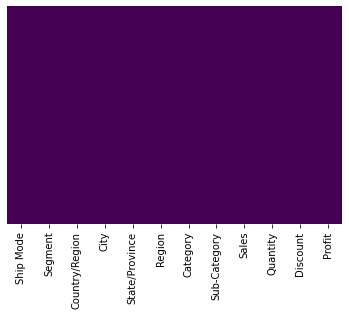

In [26]:
#visualization of missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
#dropping of duplicate values
df.drop_duplicates().head(2)

,Ship Mode,Segment,Country/Region,City,State/Province,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,United States,Houston,Texas,Central,Office Supplies,Paper,16.448,2,0.2,5.5512
1,Standard Class,Home Office,United States,Naperville,Illinois,Central,Office Supplies,Binders,3.540,2,0.8,-5.4870


In [28]:
#correlation among the columns
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.198457,-0.027756,0.481460
Quantity,0.198457,1.000000,0.007475,0.066145
Discount,-0.027756,0.007475,1.000000,-0.218882
Profit,0.481460,0.066145,-0.218882,1.000000


In [29]:
#covariance between set of variables
df.cov()

,Sales,Quantity,Discount,Profit
Sales,384284.488765,274.137762,-3.548755,69381.578897
Quantity,274.137762,4.965396,0.003435,34.263759
Discount,-3.548755,0.003435,0.042538,-10.494423
Profit,69381.578897,34.263759,-10.494423,54040.029718


1.   =  0 then uncorrelated
2.   >  0 then positively correlated
3.   > < 0 then negatively correlated

In [30]:
#slicing of data
df.iloc[0]

Ship Mode          Standard Class
Segment                  Consumer
Country/Region      United States
City                      Houston
State/Province              Texas
Region                    Central
Category          Office Supplies
Sub-Category                Paper
Sales                      16.448
Quantity                        2
Discount                      0.2
Profit                     5.5512
Name: 0, dtype: object

In [31]:
#summary of the data
df.value_counts()

Ship Mode       Segment      Country/Region  City         State/Province             Region  Category         Sub-Category  Sales     Quantity  Discount  Profit   
Standard Class  Consumer     Canada          Quebec City  Quebec                     East    Office Supplies  Fasteners     19.600    5         0.0        9.6040      5
                Corporate    Canada          St. John's   Newfoundland and Labrador  East    Furniture        Furnishings   99.120    8         0.0        35.4144     5
                Consumer     Canada          Quebec City  Quebec                     East    Furniture        Furnishings   68.460    2         0.0        20.5380     5
                Corporate    Canada          Toronto      Ontario                    East    Technology       Phones        209.500   10        0.0        58.6600     4
                                                                                             Furniture        Furnishings   24.300    5         0.0        10.45

## **Visualization of data**

**Bar plot between sub-category vs category**

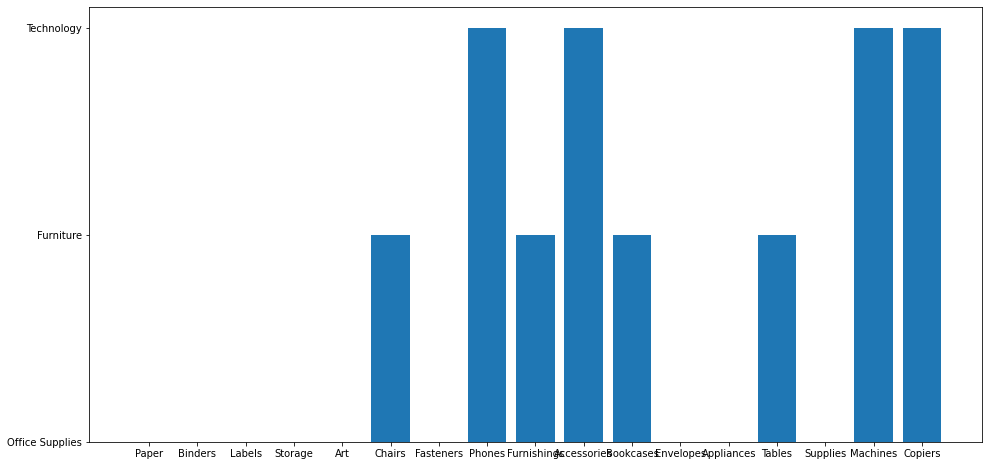

In [32]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df)
plt.show()

*   office supplies category the frequency of individual item is low
*   funiture category the frequency of individual item is medium
*   technology the frequency of individual item is high


## **Pie plot of sub-category**

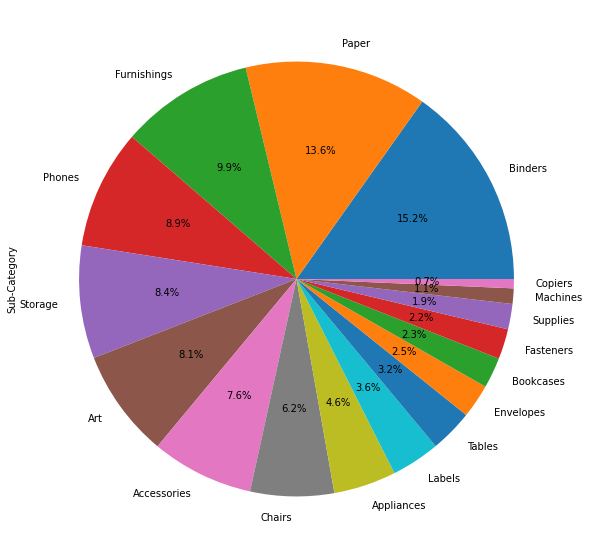

In [33]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## Bar plot of sales VS profit

<ipython-input-34-162003a84d80>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


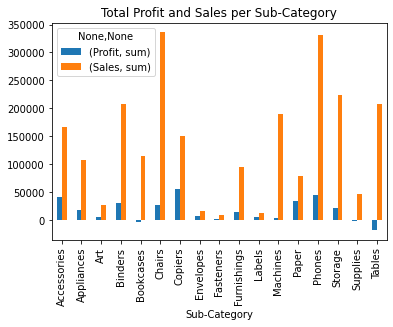

In [34]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.rcParams['figure.figsize']=[16,6]
plt.show()

highest sales 

California                   2001
New York                     1128
Texas                         985
Pennsylvania                  587
Washington                    506
Illinois                      492
Ohio                          469
Florida                       383
Michigan                      255
North Carolina                249
Virginia                      224
Arizona                       224
Georgia                       184
Tennessee                     183
Colorado                      182
Indiana                       149
Kentucky                      139
Massachusetts                 135
New Jersey                    130
Oregon                        124
Wisconsin                     110
Maryland                      105
Delaware                       96
Minnesota                      89
Connecticut                    82
Missouri                       66
Oklahoma                       66
Alabama                        61
Arkansas                       60
Ontario       

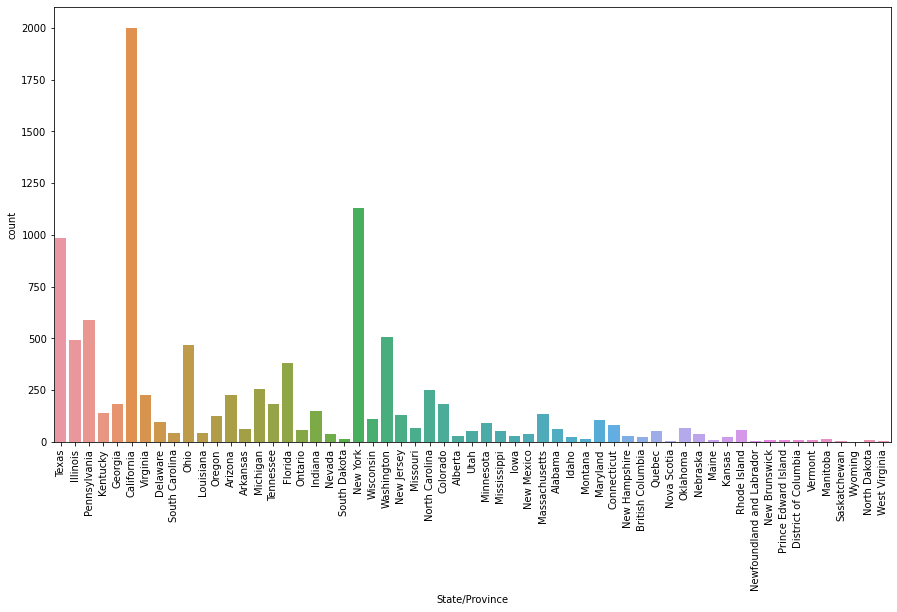

In [35]:
#count plot of cities
print(df['State/Province'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df['State/Province'])
plt.xticks(rotation=90)
plt.show()

sales and profit region wise

<ipython-input-36-1374d671a37e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()


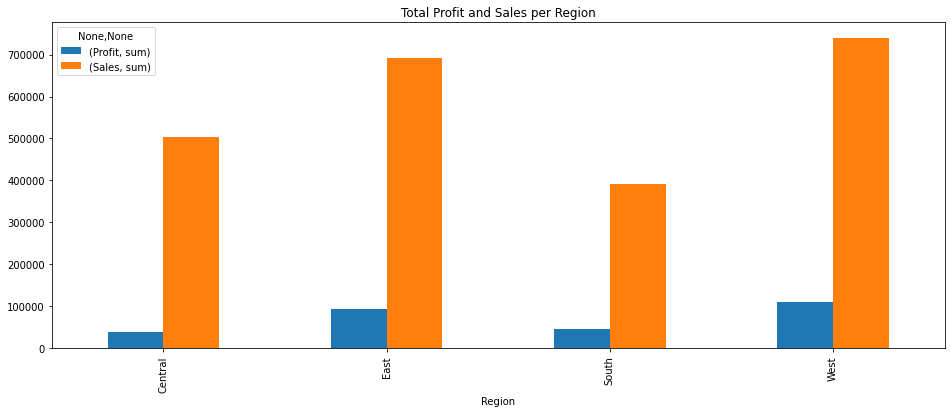

In [36]:
df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Region')
plt.rcParams['figure.figsize']=[10,8]
plt.show()

Binders        1548
Paper          1384
Furnishings    1009
Phones          903
Storage         856
Art             821
Accessories     775
Chairs          634
Appliances      474
Labels          368
Tables          326
Envelopes       256
Bookcases       232
Fasteners       229
Supplies        192
Machines        117
Copiers          70
Name: Sub-Category, dtype: int64


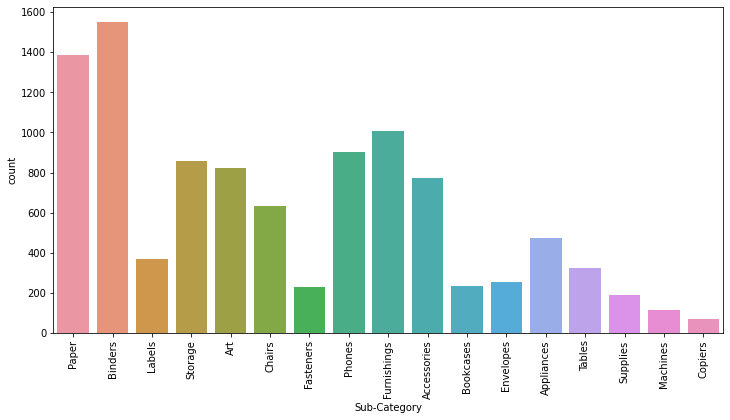

In [37]:
#count plot of sub-categories
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

## **Heat map of Correlation among the columns**

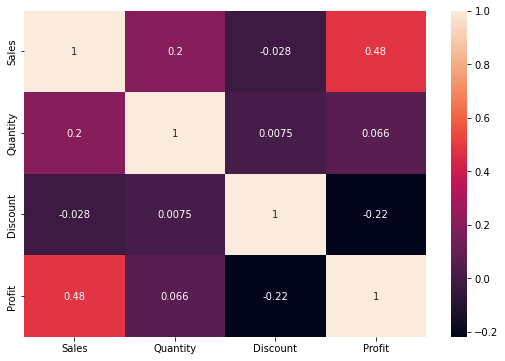

In [38]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

## **Heat map of Covariance among the set of variables**

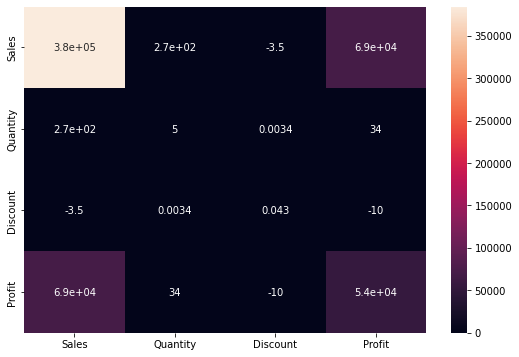

In [39]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df.cov(), annot=True)
plt.show()

<AxesSubplot:xlabel='Segment', ylabel='count'>

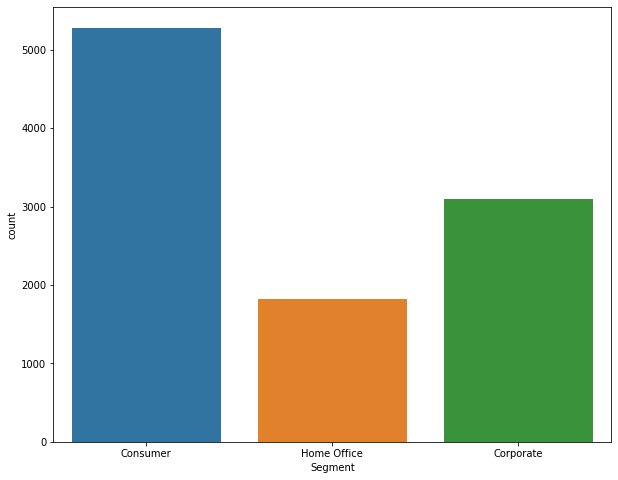

In [40]:
#count plot of Segment
sns.countplot(x=df['Segment'])

<AxesSubplot:xlabel='Region', ylabel='count'>

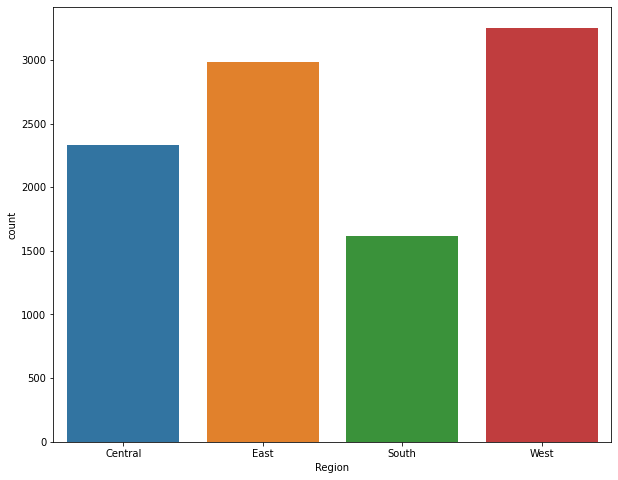

In [41]:
#count plot of Region
sns.countplot(x=df["Region"])

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

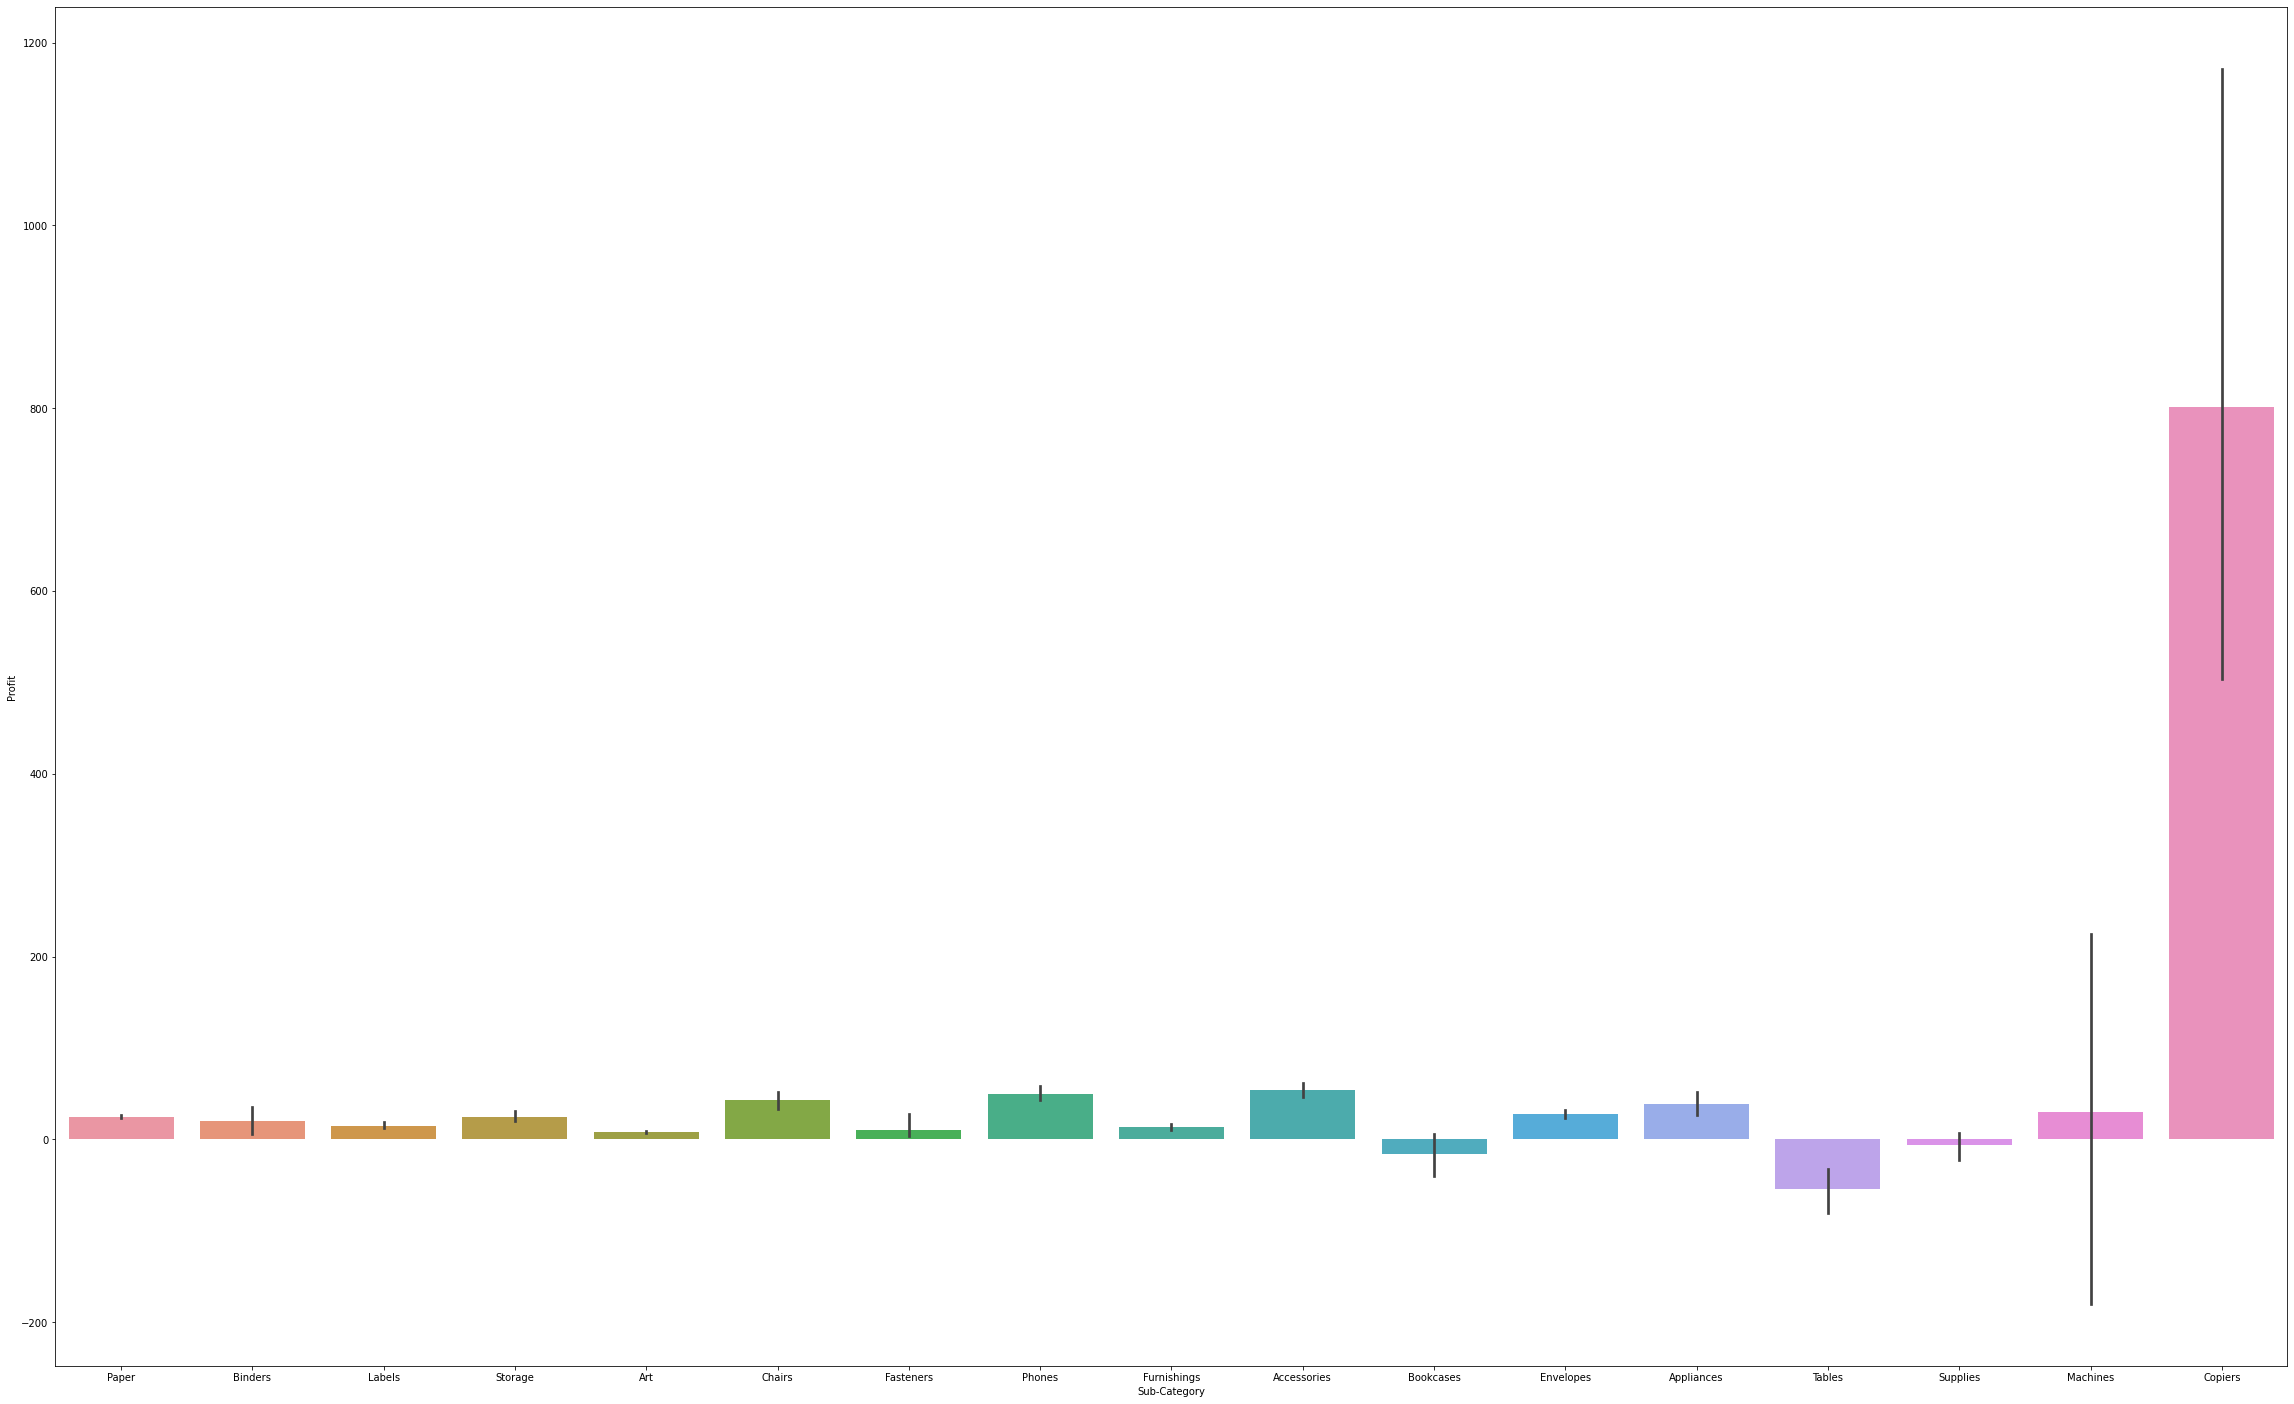

In [42]:
#bar plot of sub-category vs profit
plt.figure(figsize=(40,25))
sns.barplot(x=df['Sub-Category'], y=df['Profit'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


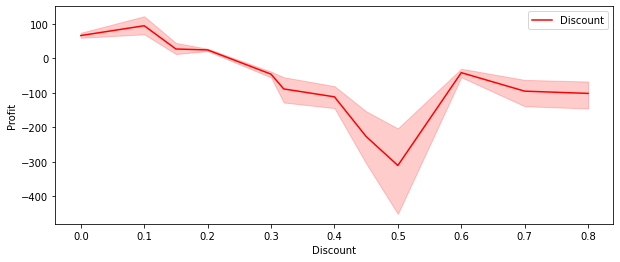

In [43]:
#line plot of discount vs profit
plt.figure(figsize = (10,4))
sns.lineplot('Discount','Profit', data = df, color ='r',label='Discount')
plt.legend()

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

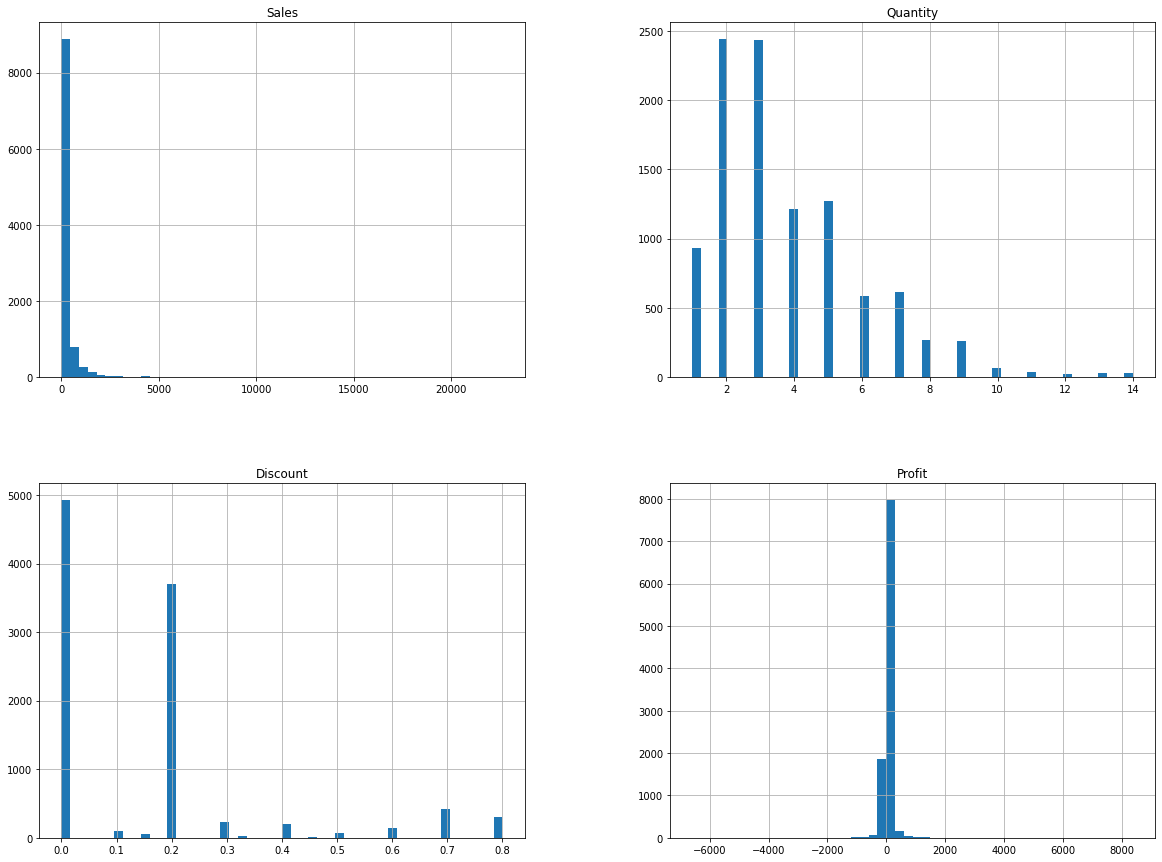

In [44]:
#histogram of data
df.hist(bins=50 ,figsize=(20,15))

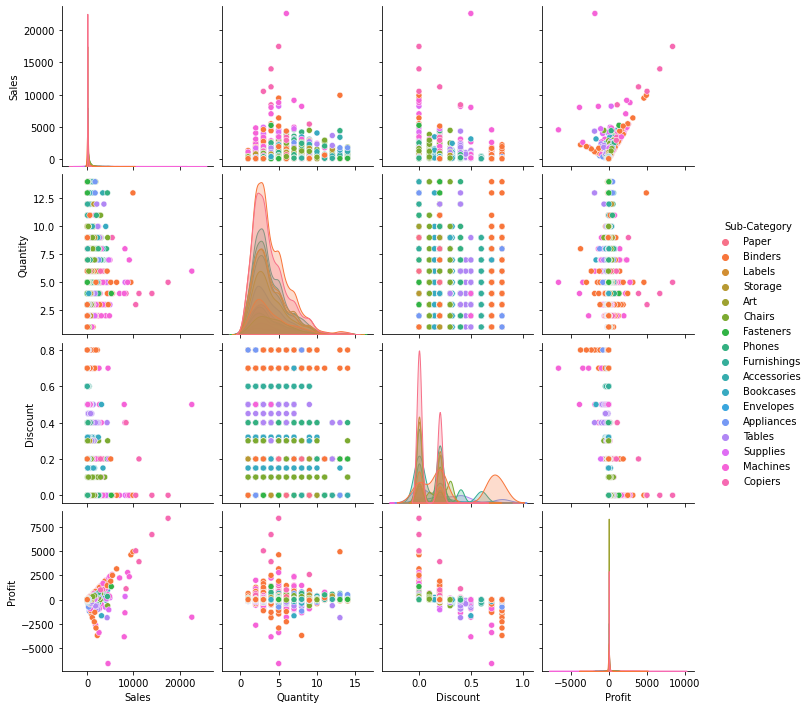

In [45]:
#pair plot of sub-category
figsize=(15,10)
sns.pairplot(df,hue='Sub-Category')

In [46]:
#Summary of data
grouped=pd.DataFrame(df.groupby(['Ship Mode', 'Segment', 'Country/Region', 'City', 'State/Province',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit']))
grouped

,0,1
0,"(First Class, Consumer, Canada, Toronto, Ontar...",Ship Mode Segment Country/Region ...
1,"(First Class, Consumer, Canada, Toronto, Ontar...",Ship Mode Segment Country/Region ...
2,"(First Class, Consumer, Canada, Winnipeg, Mani...",Ship Mode Segment Country/Region ...
3,"(First Class, Consumer, Canada, Winnipeg, Mani...",Ship Mode Segment Country/Region ...
4,"(First Class, Consumer, Canada, Winnipeg, Mani...",Ship Mode Segment Country/Region ...
...,...,...
10077,"(Standard Class, Home Office, United States, W...",Ship Mode Segment Country/Regi...
10078,"(Standard Class, Home Office, United States, W...",Ship Mode Segment Country/Regi...
10079,"(Standard Class, Home Office, United States, W...",Ship Mode Segment Country/Regi...
10080,"(Standard Class, Home Office, United States, Y...",Ship Mode Segment Country/Regi...


## **Stastistical summary of data**

In [48]:
df.groupby('State/Province').Profit.agg(['sum','mean','min','max','count','median','std','var'])

,sum,mean,min,max,count,median,std,var
State/Province,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Alberta,2236.1578,86.006069,-59.8400,1351.9896,26,14.98030,262.139903,68717.328894
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
British Columbia,115.6703,5.257741,-97.1800,68.3332,22,8.76500,37.123491,1378.153564
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126


## **Pair plot of data**

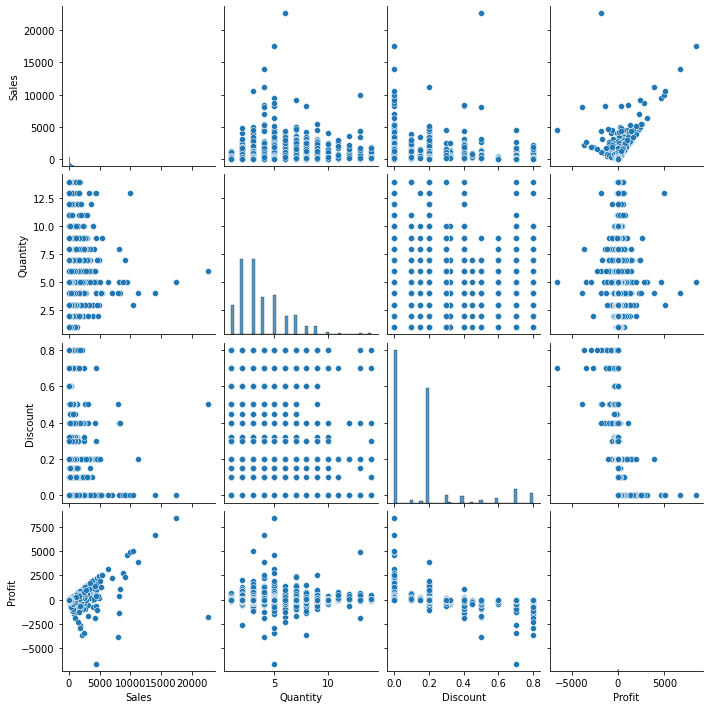

In [49]:
sns.pairplot(df)

## **Box plot of Sales**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

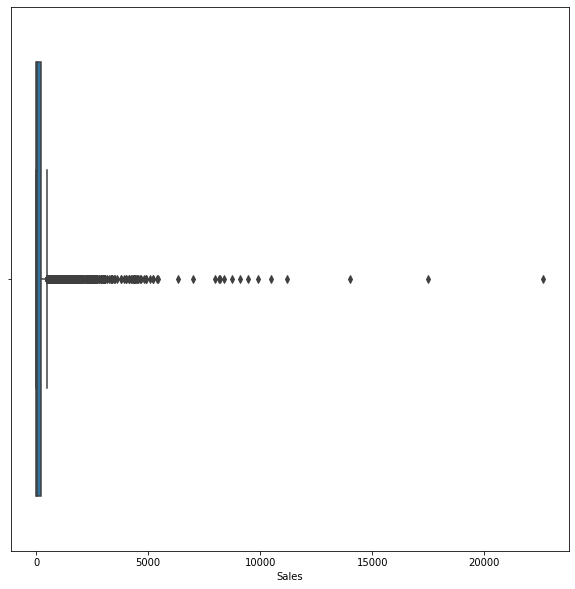

In [50]:
fig, axes = plt.subplots(figsize = (10, 10))
sns.boxplot(df['Sales'])

## **Box plot of Discount**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount'>

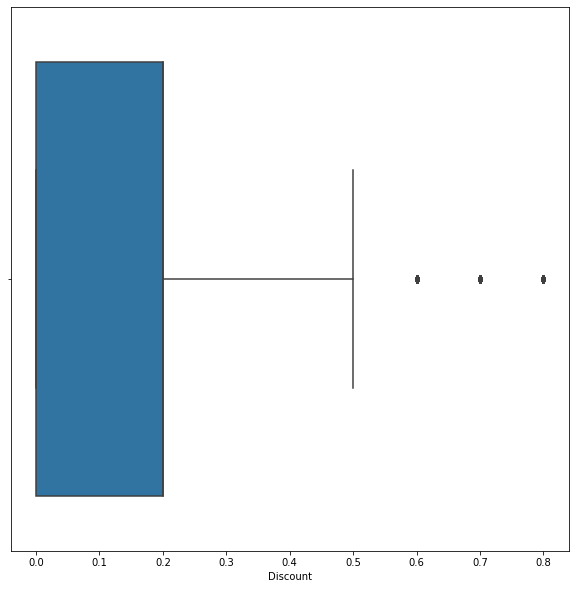

In [51]:
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(df['Discount'])

## **Box plot of Profit**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

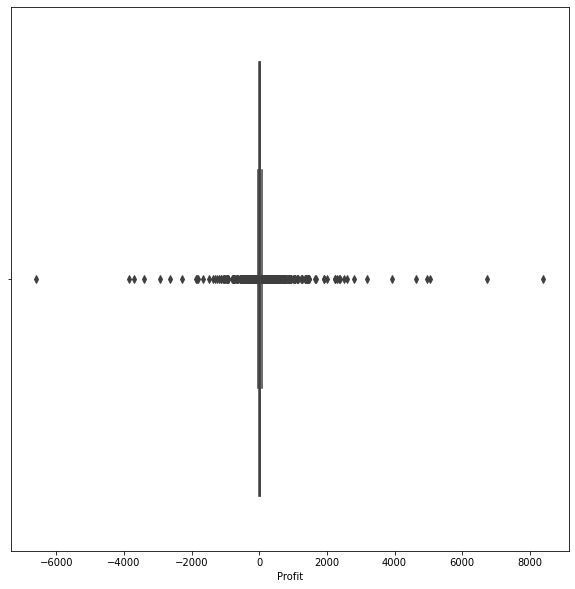

In [52]:
fig, axes = plt.subplots(figsize =(10,10))
sns.boxplot(df['Profit'])

In [53]:
Q1 = df.quantile(q=0.25, axis = 0, numeric_only = True, interpolation = 'linear')
Q3 = df.quantile(q=0.75, axis = 0, numeric_only = True, interpolation = 'linear')

In [54]:
IQR = Q3 - Q1
print(IQR)

Sales       192.280000
Quantity      3.000000
Discount      0.200000
Profit       27.537125
dtype: float64


<AxesSubplot:xlabel='Ship Mode,Segment,Country/Region,City,State/Province,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit'>

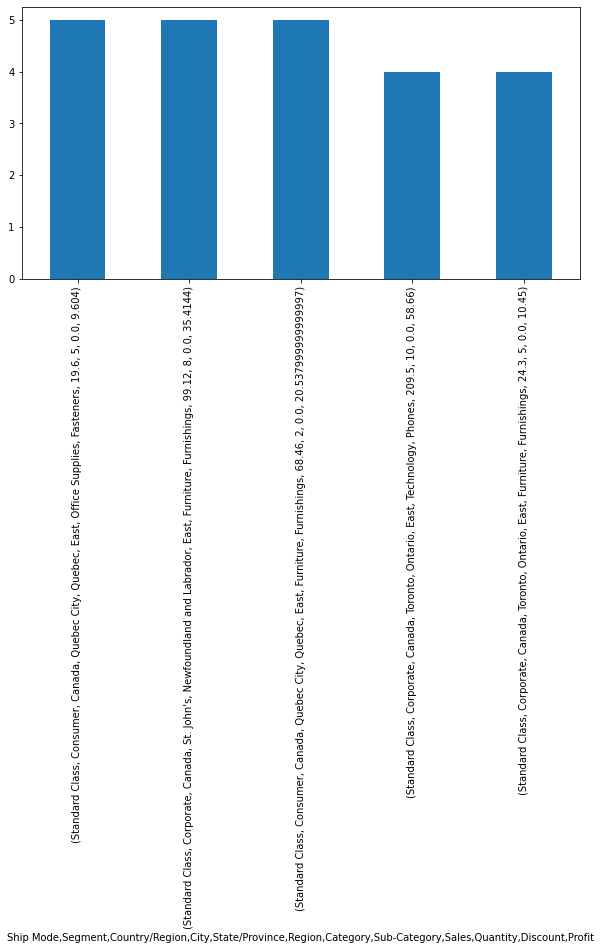

In [55]:
df.value_counts().nlargest().plot(kind='bar',figsize=(10,5))

## **Plot of Value Counts**

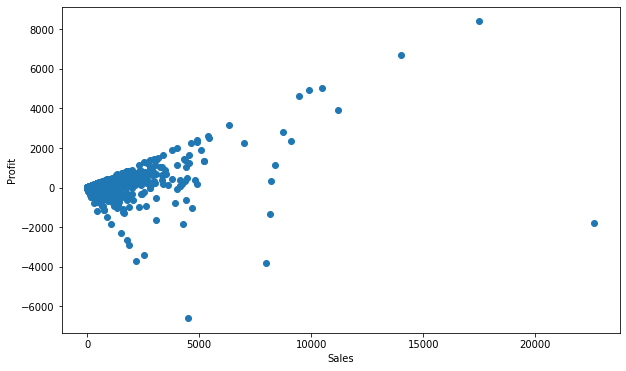

In [56]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['Sales'], df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

## **Sales Statistical data**

count    10194.000000
mean       228.225854
std        619.906839
min          0.444000
25%         17.220000
50%         53.910000
75%        209.500000
max      22638.480000
Name: Sales, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


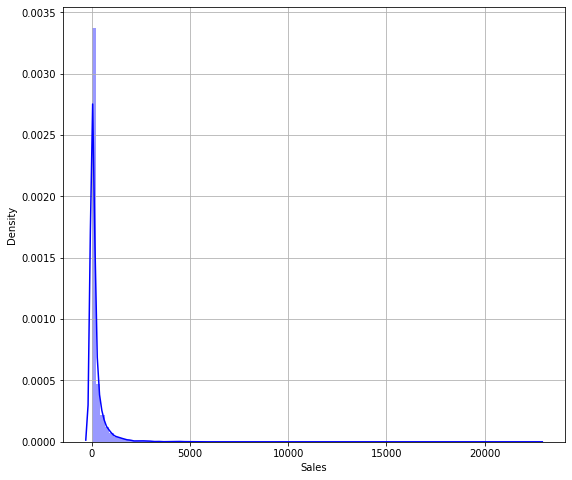

In [57]:
print(df['Sales'].describe())
plt.figure(figsize = (9,8))
plt.grid()
sns.distplot(df['Sales'],color = 'b', bins = 100, hist_kws = {'alpha':0.4});

## **Box plot of Sales, Quantity, Discount & Profit**

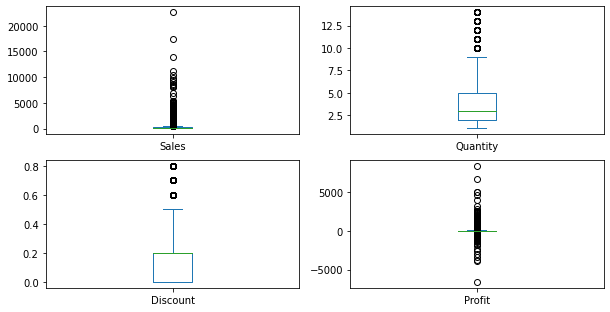

In [58]:
df.plot(kind='box',subplots=True, layout=(3,2), sharex=False, sharey=False)
plt.rcParams['figure.figsize']=[14,12] 
plt.show()

## **Clustering of data**

In [70]:
import sklearn as scikit_learn
from sklearn.cluster import KMeans

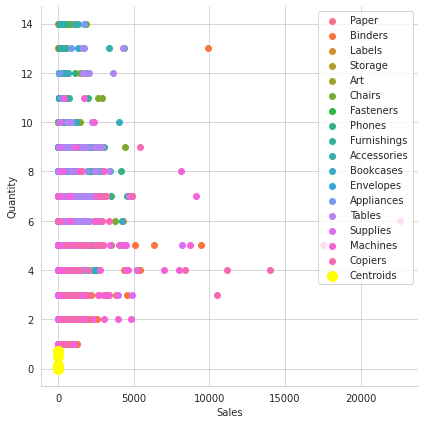

In [87]:
x = df.iloc[:, [9,10,11]].values
#from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Sub-Category',height =6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.rcParams['figure.figsize'] = [10,8]
plt.legend()

## **Conclusion**

In [ ]:
#low profit in south & central region 
#higher profit in east & west region compared to east & south
#high profit items copiers highest sales  chairs and phones 
#insight buyers dont perfer to buy tables and bookcases from superstore
#highest varity of office supplies / binder/ paper
#negative correlation between profit / discount
#total sum of profit in sale of tables is negative
#copiers provide the best profit in supplies
#technology segment is most profitable